In [59]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [124]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1,0,ksize = sobel_kernel)
    if orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0,1,ksize = sobel_kernel)
    mag = np.absolute(sobel)
    scaled_sobel = np.uint8(255*mag/np.max(mag))
    grad_binary =  np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return grad_binary

In [157]:
def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1,0,ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0,1,ksize = sobel_kernel)
    grad_mag = np.sqrt(sobelx**2+sobely**2)
    scaled_sobel = np.uint8(255*grad_mag/np.max(grad_mag))
    mag_binary =  np.zeros_like(scaled_sobel)
    mag_binary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    return mag_binary

In [158]:
def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1,0,ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0,1,ksize = sobel_kernel)
    magx = np.absolute(sobelx)
    magy = np.absolute(sobely)
    grad_dir = np.arctan2(magy, magx)
    dir_binary =  np.zeros_like(grad_dir)
    dir_binary[(grad_dir >= thresh[0]) & (grad_dir <= thresh[1])] = 1
    return dir_binary

In [159]:
image = mpimg.imread('signs_vehicles_xygrad.png')

In [160]:
ksize=3

In [184]:
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100))

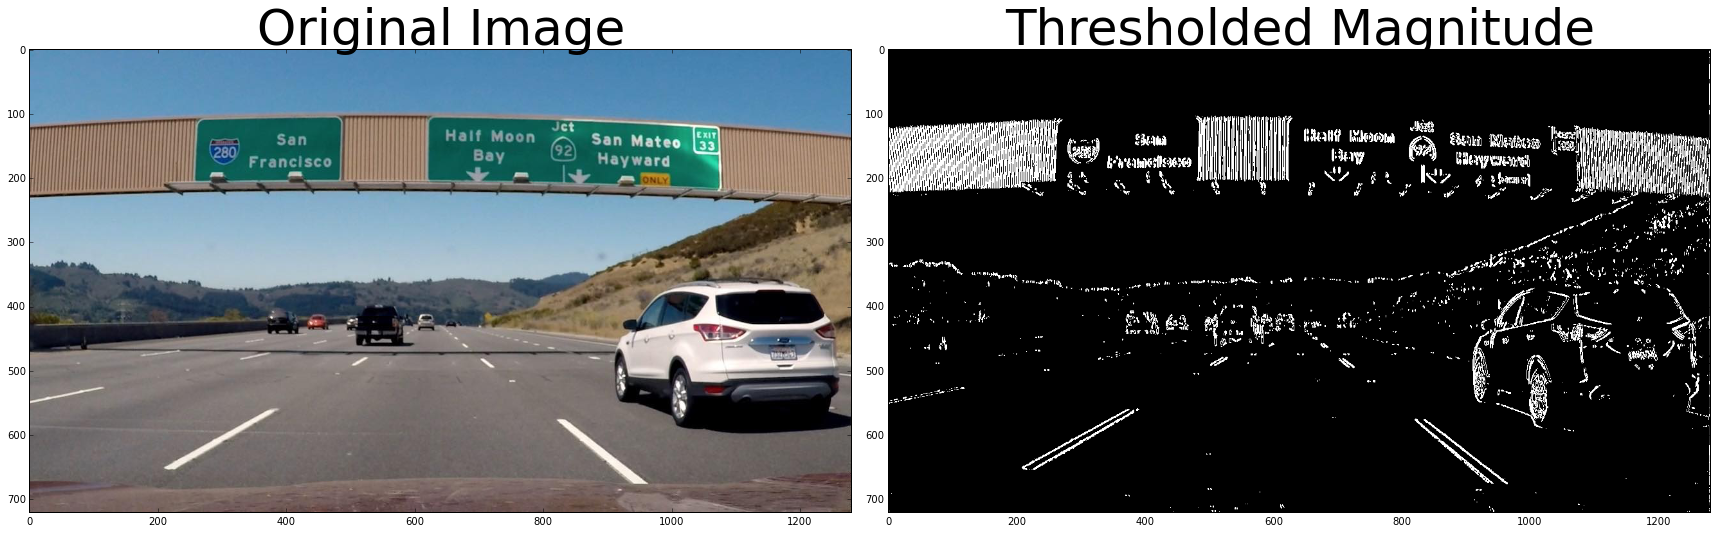

In [185]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(gradx, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [186]:
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(30, 100))

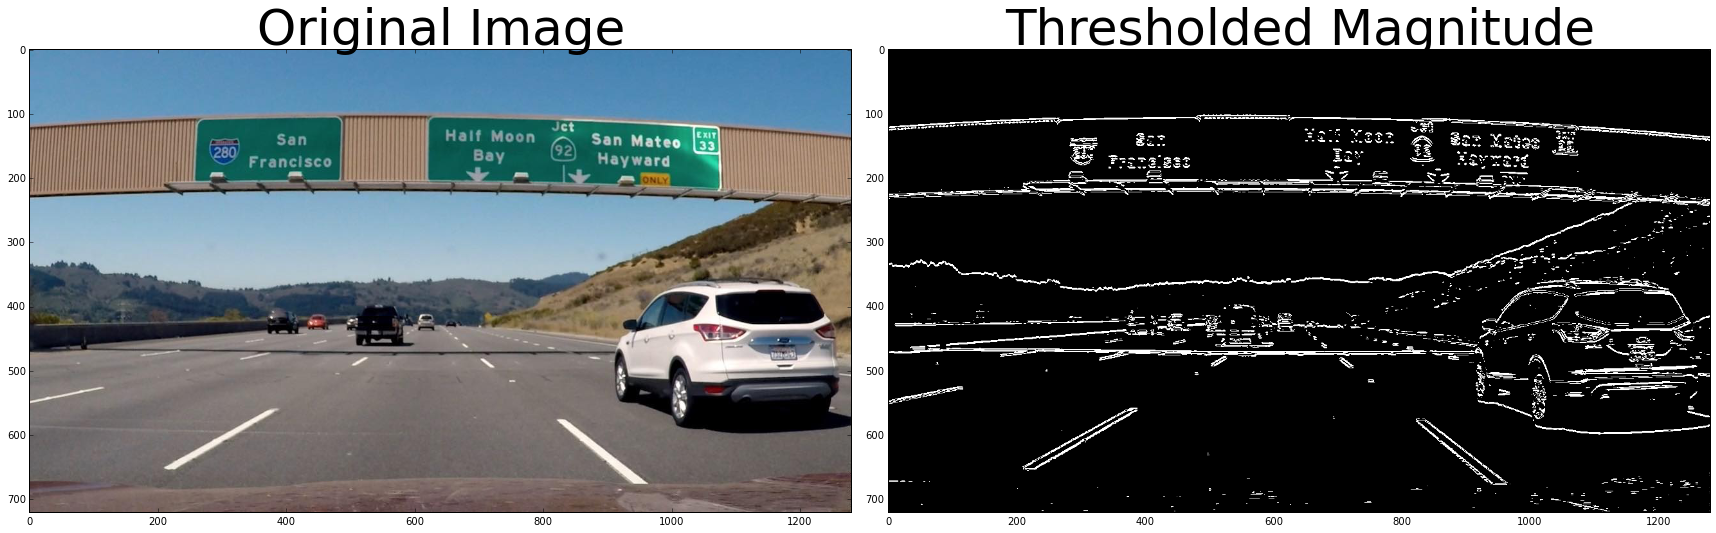

In [187]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grady, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)

In [192]:
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))

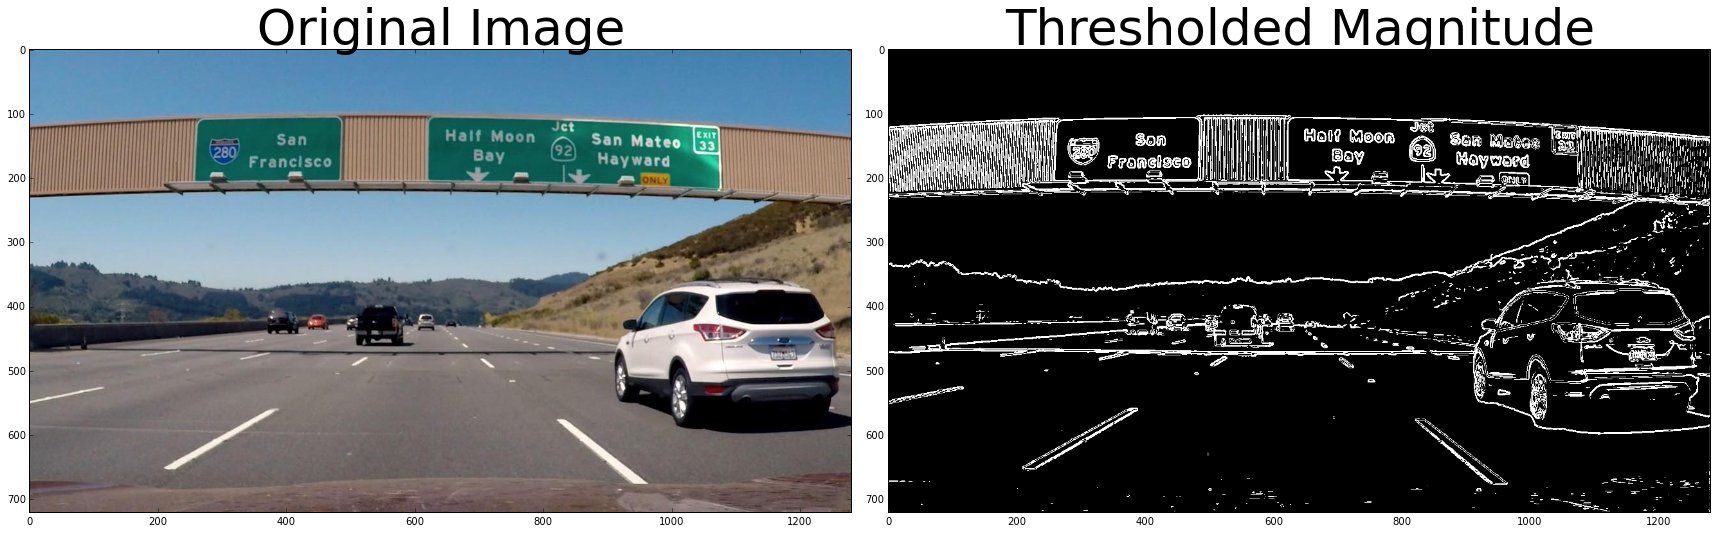

In [193]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)

In [196]:
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))

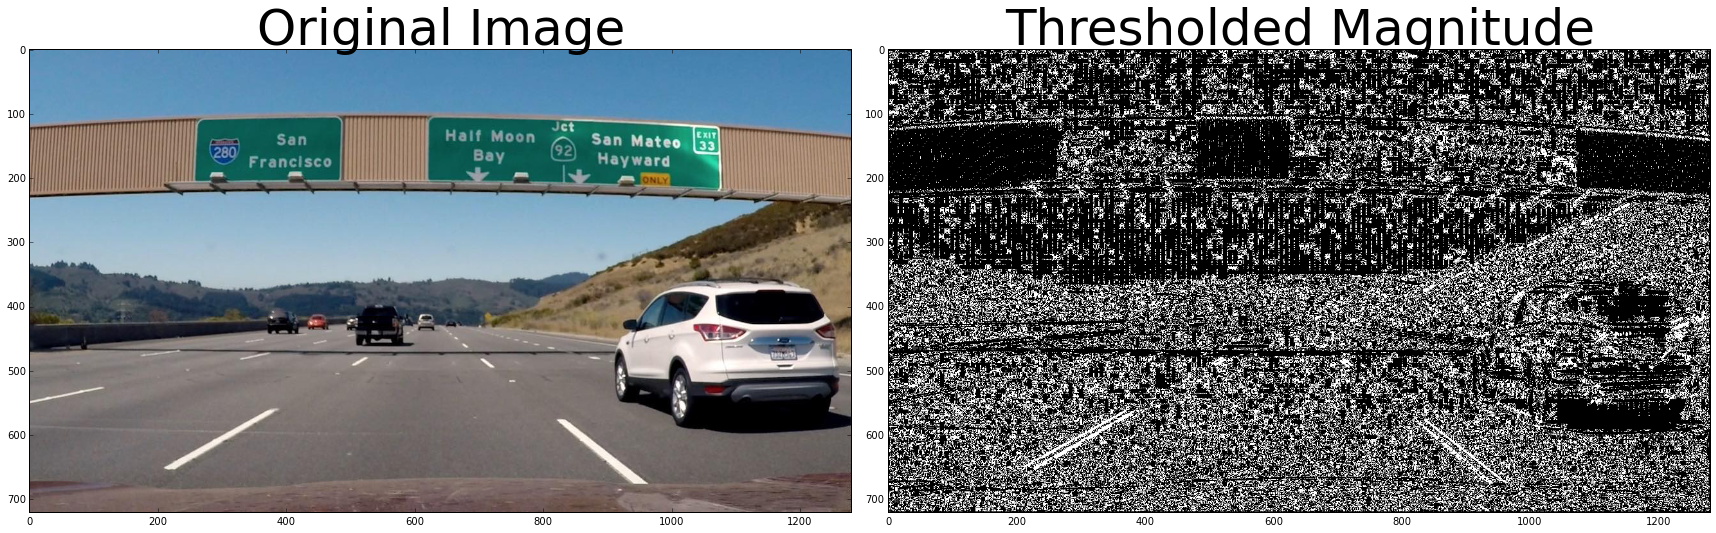

In [197]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)

In [198]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

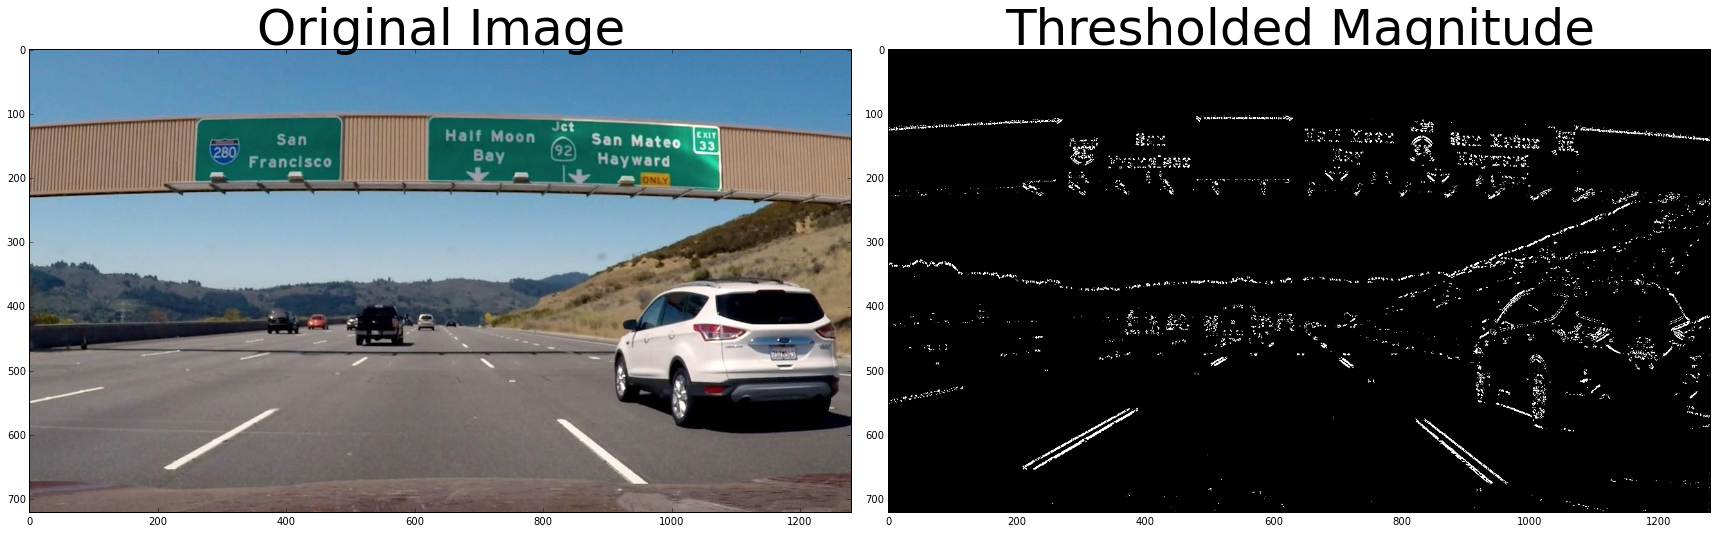

In [199]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)